In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [2]:
Data=pd.read_csv('titanic.csv')
Data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Data.drop('Name',axis=1,inplace=True)

In [4]:
Data.drop('Ticket',axis=1,inplace=True)
Data.drop('Cabin',axis=1,inplace=True)
Data1=pd.get_dummies(Data,columns=['Pclass','Sex','Embarked'])
Data1.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,True,False,False,False,True
4,5,0,35.0,0,0,8.0500,False,False,True,False,True,False,False,True


In [5]:
Data1.drop('PassengerId',axis=1,inplace=True)
for col in Data1.select_dtypes(include=['float64', 'int64']).columns:
    Data1[col].fillna(Data[col].median(), inplace=True)
Data_cleaned=Data1.astype(int)
Data_cleaned

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22,1,0,7,0,0,1,0,1,0,0,1
1,1,38,1,0,71,1,0,0,1,0,1,0,0
2,1,26,0,0,7,0,0,1,1,0,0,0,1
3,1,35,1,0,53,1,0,0,1,0,0,0,1
4,0,35,0,0,8,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27,0,0,13,0,1,0,0,1,0,0,1
887,1,19,0,0,30,1,0,0,1,0,0,0,1
888,0,28,1,2,23,0,0,1,1,0,0,0,1
889,1,26,0,0,30,1,0,0,0,1,1,0,0


In [6]:
correlation_matrix = Data_cleaned.corr()

print(correlation_matrix)

            Survived       Age     SibSp     Parch      Fare  Pclass_1  \
Survived    1.000000 -0.064909 -0.035322  0.081629  0.257482  0.285904   
Age        -0.064909  1.000000 -0.233066 -0.172745  0.097064  0.324090   
SibSp      -0.035322 -0.233066  1.000000  0.414838  0.159506 -0.054582   
Parch       0.081629 -0.172745  0.414838  1.000000  0.216252 -0.017633   
Fare        0.257482  0.097064  0.159506  0.216252  1.000000  0.591693   
Pclass_1    0.285904  0.324090 -0.054582 -0.017633  0.591693  1.000000   
Pclass_2    0.093349  0.015628 -0.055932 -0.000734 -0.116346 -0.288585   
Pclass_3   -0.322308 -0.291957  0.092548  0.015790 -0.415117 -0.626738   
Sex_female  0.543351 -0.080750  0.114631  0.245489  0.182331  0.098013   
Sex_male   -0.543351  0.080750 -0.114631 -0.245489 -0.182331 -0.098013   
Embarked_C  0.168240  0.029732 -0.059528 -0.011069  0.269165  0.296423   
Embarked_Q  0.003650 -0.031479 -0.026354 -0.081228 -0.118319 -0.155342   
Embarked_S -0.155660 -0.014176  0.0709

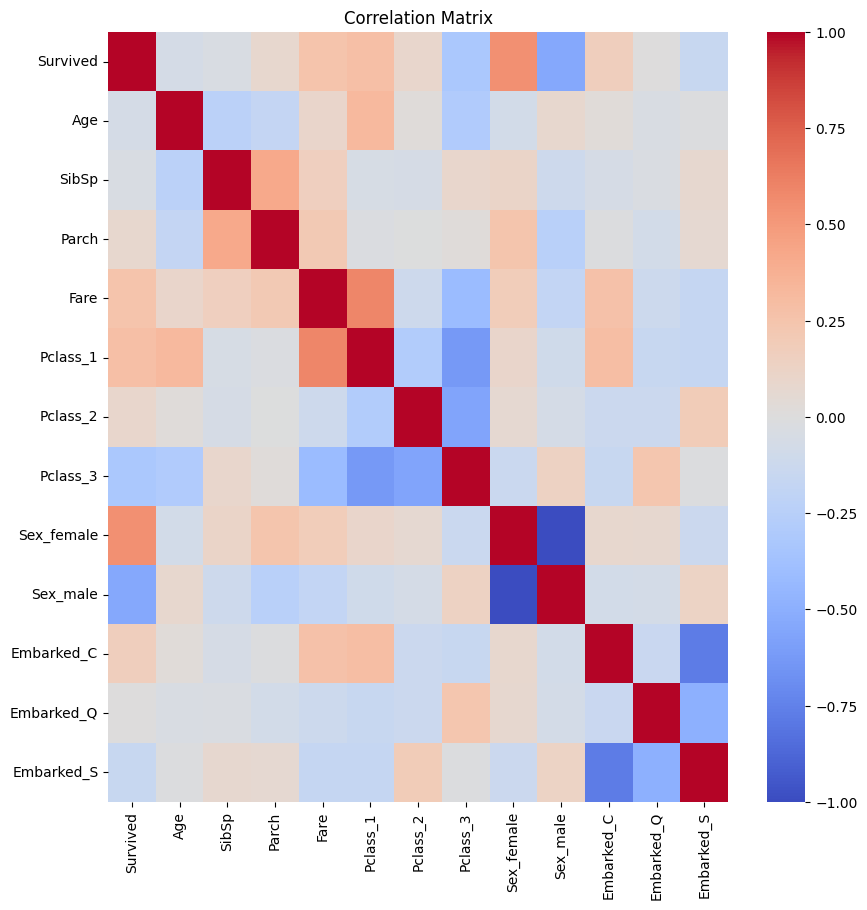

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Show the plot
plt.title('Correlation Matrix')
plt.show()

In [8]:
Data_cleaned.drop('Sex_male',axis=1,inplace=True)
y=Data_cleaned['Survived']
Data_cleaned.drop('Survived',axis=1,inplace=True)
X=Data_cleaned

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=(X_train-X_train.mean())/X_train.std()
X_train=X_train.values
X_test=(X_test-X_test.mean())/X_test.std()
X_test=X_test.values
y_train=(y_train-y_train.mean())/y_train.std()
y_train=y_train.values
y_train=y_train.reshape(-1,1)
y_test=y_test.values
y_test=y_test.reshape(-1,1)
theta=np.zeros((11,1))
def sigmoid_func(x,theta):
    z=np.dot(x,theta)
    sig=1/(1+np.exp(-z))
    return sig

In [10]:
def gradient(x,y_tr,theta,itera,learning_rate):
    loss_history=np.zeros(itera);
    for i in range(itera):
        h_theta=sigmoid_func(x,theta)
        gradient=np.sum(np.dot(x.T,(y_tr-h_theta)))/712
        theta=theta+learning_rate*gradient
        loss_history[i]=np.sum(np.dot(y_tr.T,np.log((h_theta)))+np.dot((1-y_tr).T,np.log((1-h_theta))))/712
        return theta,loss_history

In [11]:
itera=5
learning_rate=0.01
theta,loss_history=gradient(X_train,y_train,theta,itera,learning_rate)
y_pred=sigmoid_func(X_test,theta)
y_prec=np.zeros((179,1))
k=0
for i in y_pred:
    if(i<0.5):
        y_prec[k]=0
    else:
        y_prec[k]=1;
    k+=1


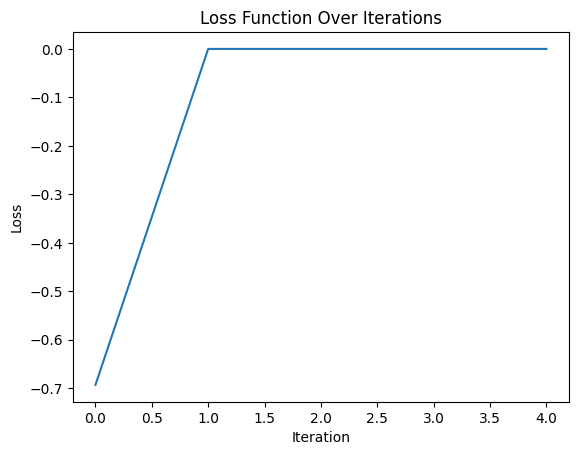

In [12]:
plt.plot(range(itera), loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Function Over Iterations")
plt.show()

In [13]:
accuracy = accuracy_score(y_test, y_prec)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


In [14]:
f1 = f1_score(y_test, y_prec, average='weighted')

In [15]:
f1

0.6667616912099461